In [1]:
#Import neccessary libraries
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
import torch.optim as optim
from torch.utils.data import DataLoader
from torchsummary import summary
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import random
import numpy as np

SEED = 1213

random.seed(SEED)
torch.manual_seed(SEED)
np.random.seed(SEED)

In [2]:
# Data transforms for training and testing
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [3]:
# Paths to your custom dataset
train_data_dir = 'Dataset_split/train'
test_data_dir = 'Dataset_split/test'

# Create ImageFolder datasets for training and testing
train_dataset = datasets.ImageFolder(train_data_dir, transform=train_transforms)
test_dataset = datasets.ImageFolder(test_data_dir, transform=test_transforms)

In [4]:
# Create data loaders for training and testing
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


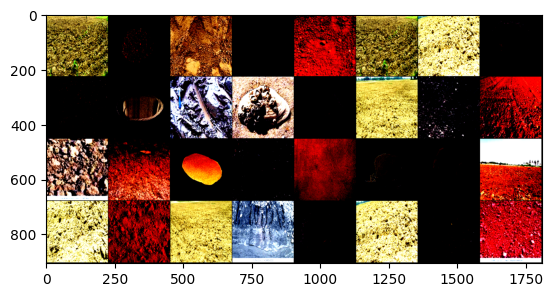

In [5]:
# Visualize the dataset
for img,label in train_loader:
    g = img
    break

grid = make_grid(g)
img = torchvision.transforms.ToPILImage()(grid)
plt.imshow(grid.permute(1,2,0))

In [6]:
# Load the pre-trained ResNet-50 model
vgg16_model = models.vgg16_bn(pretrained=True)
num_classes = len(train_dataset.classes)
vgg16_model.classifier[-1] = nn.Linear(4096, num_classes)

C:\Users\rwama\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\rwama\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [7]:
# Print model summary
summary(vgg16_model, (3,224,224))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 512, 7, 7]           --
|    └─Conv2d: 2-1                       [-1, 64, 224, 224]        1,792
|    └─BatchNorm2d: 2-2                  [-1, 64, 224, 224]        128
|    └─ReLU: 2-3                         [-1, 64, 224, 224]        --
|    └─Conv2d: 2-4                       [-1, 64, 224, 224]        36,928
|    └─BatchNorm2d: 2-5                  [-1, 64, 224, 224]        128
|    └─ReLU: 2-6                         [-1, 64, 224, 224]        --
|    └─MaxPool2d: 2-7                    [-1, 64, 112, 112]        --
|    └─Conv2d: 2-8                       [-1, 128, 112, 112]       73,856
|    └─BatchNorm2d: 2-9                  [-1, 128, 112, 112]       256
|    └─ReLU: 2-10                        [-1, 128, 112, 112]       --
|    └─Conv2d: 2-11                      [-1, 128, 112, 112]       147,584
|    └─BatchNorm2d: 2-12                 [-1, 128, 112, 112]      

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 512, 7, 7]           --
|    └─Conv2d: 2-1                       [-1, 64, 224, 224]        1,792
|    └─BatchNorm2d: 2-2                  [-1, 64, 224, 224]        128
|    └─ReLU: 2-3                         [-1, 64, 224, 224]        --
|    └─Conv2d: 2-4                       [-1, 64, 224, 224]        36,928
|    └─BatchNorm2d: 2-5                  [-1, 64, 224, 224]        128
|    └─ReLU: 2-6                         [-1, 64, 224, 224]        --
|    └─MaxPool2d: 2-7                    [-1, 64, 112, 112]        --
|    └─Conv2d: 2-8                       [-1, 128, 112, 112]       73,856
|    └─BatchNorm2d: 2-9                  [-1, 128, 112, 112]       256
|    └─ReLU: 2-10                        [-1, 128, 112, 112]       --
|    └─Conv2d: 2-11                      [-1, 128, 112, 112]       147,584
|    └─BatchNorm2d: 2-12                 [-1, 128, 112, 112]      

In [8]:
print(vgg16_model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [9]:
# Define a loss function and the Adam optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg16_model.parameters(), lr=0.001)

In [10]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [11]:
# Testing the model
def test_model(model,loader,device):
    model.eval()
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    return accuracy
    


In [12]:
# Training loop
# Do not run this cell if you just want to test the pretrained model
num_epochs = 20
vgg16_model.to(device)
temp_acc = [0]
for epoch in range(num_epochs):
    vgg16_model.train()

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = vgg16_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
    test_acc = test_model(vgg16_model,test_loader,device)
    if (test_acc >= max(temp_acc)):
        #save model with best test accuracy
        torch.save(vgg16_model.state_dict(), 'custom_vgg16bn_na.pth')
    temp_acc.append(test_acc)
    print(f"Epoch {epoch + 1}/{num_epochs} Loss: {loss.item()} Test acc: {test_acc}")

print("Training complete")

Epoch 1/20 Loss: 5.134278774261475 Test acc: 78.04878048780488
Epoch 2/20 Loss: 0.6176453232765198 Test acc: 76.65505226480836
Epoch 3/20 Loss: 1.0663933753967285 Test acc: 74.56445993031359
Epoch 4/20 Loss: 1.8623569011688232 Test acc: 77.35191637630662
Epoch 5/20 Loss: 0.8550981283187866 Test acc: 85.71428571428571
Epoch 6/20 Loss: 0.4988688826560974 Test acc: 78.397212543554
Epoch 7/20 Loss: 0.33249878883361816 Test acc: 86.41114982578397
Epoch 8/20 Loss: 0.39592915773391724 Test acc: 87.8048780487805
Epoch 9/20 Loss: 1.06732177734375 Test acc: 78.04878048780488
Epoch 10/20 Loss: 0.5177157521247864 Test acc: 79.79094076655052
Epoch 11/20 Loss: 0.13901200890541077 Test acc: 90.59233449477352
Epoch 12/20 Loss: 0.549180805683136 Test acc: 71.77700348432056
Epoch 13/20 Loss: 0.41843312978744507 Test acc: 92.6829268292683
Epoch 14/20 Loss: 0.47612711787223816 Test acc: 93.37979094076655
Epoch 15/20 Loss: 0.7848067879676819 Test acc: 91.98606271777004
Epoch 16/20 Loss: 0.3478548526763916 

In [13]:
print(f"Best test accuracy: {max(temp_acc)}")

Best test accuracy: 93.72822299651568


In [21]:
import time
from PIL import Image
import torchvision.transforms as transforms

# Define a function for inference
def predict_custom_image(image_path, model, device):

    # Load the image and apply the same transformations used during training
    image = Image.open(image_path)
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = preprocess(image)
    image = image.unsqueeze(0)  # Add a batch dimension

    # Move the image to the same device as the model (CPU or GPU)
    image = image.to(device)

    # Make the prediction
    model.eval()
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)
        class_index = predicted.item()
        class_name = train_dataset.classes[class_index]
    
    return class_name



In [22]:
# Usage
custom_image_path =  "Dataset_split/test/Clay soil/images22.jpg"
predicted_class = predict_custom_image(custom_image_path, vgg16_model, device)
print(f"The model predicts that the image belongs to class: {predicted_class}")

The model predicts that the image belongs to class: Clay soil


In [23]:
# Load saved model
saved_model = models.vgg16_bn(pretrained=True)
num_classes = len(train_dataset.classes)
saved_model.classifier[-1] = nn.Linear(4096, num_classes)

saved_model.load_state_dict(torch.load('custom_vgg16bn_na.pth'))
saved_model = saved_model.to(device)

C:\Users\rwama\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\rwama\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [24]:
print(f"Test Accuracy: {test_model(saved_model,test_loader,device)}%")

Test Accuracy: 93.72822299651568%


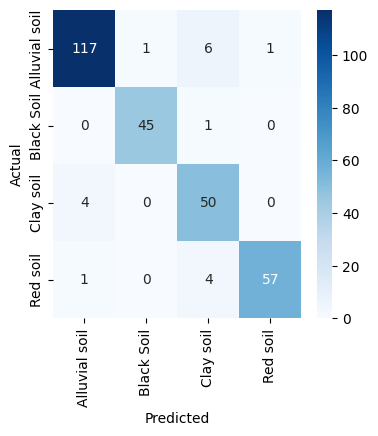

In [25]:
def create_confusion_matrix(model, test_loader, num_classes):
    model.eval()

    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            _, predictions = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predictions.cpu().numpy())

    cm = confusion_matrix(all_labels, all_predictions, labels=list(range(num_classes)))
    clsreport = classification_report(all_labels, all_predictions)
    return cm, clsreport

def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(len(class_names), len(class_names)))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

num_classes = len(test_dataset.classes)
confusion_matrix_result, clsreport = create_confusion_matrix(saved_model, test_loader, num_classes)
class_names = test_loader.dataset.classes

plot_confusion_matrix(confusion_matrix_result, class_names)


In [26]:
print(clsreport)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       125
           1       0.98      0.98      0.98        46
           2       0.82      0.93      0.87        54
           3       0.98      0.92      0.95        62

    accuracy                           0.94       287
   macro avg       0.93      0.94      0.94       287
weighted avg       0.94      0.94      0.94       287



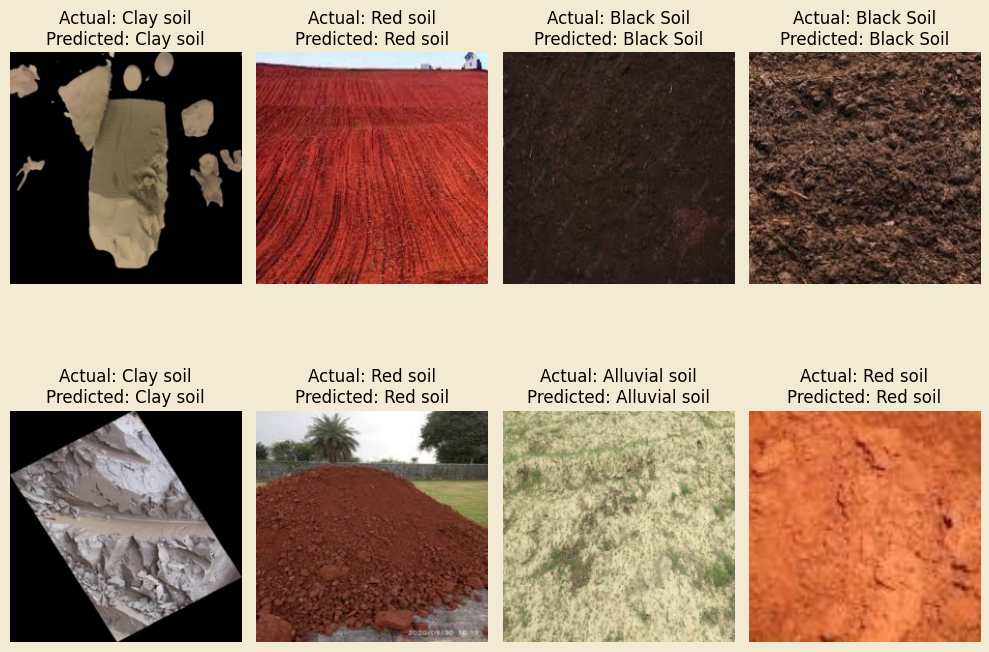

In [20]:

def denormalize(tensor, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]):

    # Clone the input tensor to avoid modifying the original tensor
    denormalized = tensor.clone()

    # Loop through each channel and apply denormalization
    for i in range(denormalized.size(0)):  # Iterate over channels
        denormalized[i, :, :] = denormalized[i, :, :] * std[i] + mean[i]

    return denormalized
    
# Function to convert tensor to image
def tensor_to_image(tensor):
    tensor = denormalize(tensor)
    image = tensor.cpu().clone().detach().numpy().squeeze()
    image = np.transpose(image, (1, 2, 0))
    # image = np.clip(image, 0, 1)  # Clip values to be in the range [0, 1]
    return image

# Function to display images with labels
def display_images(images, actual_labels, predicted_labels):
    fig, axes = plt.subplots(2, 4, figsize=(10, 8))
    axes = axes.flatten()
    for i, (image, actual, predicted) in enumerate(zip(images, actual_labels, predicted_labels)):
        axes[i].imshow(image)
        axes[i].set_title(f"Actual: {actual}\nPredicted: {predicted}")
        axes[i].axis('off')

    fig.patch.set_facecolor('#f2ead3')
    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Choose 4 random images from the test set
selected_images = []
actual_labels = []
predicted_labels = []

for _ in range(8):
    data = next(iter(test_loader))
    image, actual_label = data[0][0].to(device), data[1][0]
    selected_images.append(tensor_to_image(image))
    actual_labels.append(test_loader.dataset.classes[actual_label])

    # Make prediction
    with torch.no_grad():
        output = saved_model(image.unsqueeze(0))
        _, predicted_label = torch.max(output.data, 1)
        predicted_labels.append(test_loader.dataset.classes[predicted_label.item()])

# Display the image grid
display_images(selected_images, actual_labels, predicted_labels)
